In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing

C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Import Lending Club Dataset on 2018Q2

### Look first two rows in the dataset and decide how to import the whole dataset in pandas 

In [47]:
with open(r'D:\Springboard\Github\Lending Club Capstone Project\LoanStats_securev1_2018Q1.csv') as df:
    for i in range(3):
        print(df.readline())

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","fico_range_low","fico_range_high","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","last_fico_range_high","last_fico_range_low","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joi

## ?? how to read top several lines when the dataset is from github 

In [71]:
with open('https://raw.githubusercontent.com/rhodapang/Lending-Club-Capstone-Project/main/LoanStats_securev1_2020Q2.csv') as df:
    for i in range(3):
        print(df.readline())

OSError: [Errno 22] Invalid argument: 'https://raw.githubusercontent.com/rhodapang/Lending-Club-Capstone-Project/main/LoanStats_securev1_2020Q2.csv'

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/rhodapang/Lending-Club-Capstone-Project/main/LoanStats_securev1_2018Q1.csv',
                 skiprows=1,sep=',')

In [49]:
df.shape

(107866, 150)

In [50]:
df.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,129897398,NaN,35000.0,35000.0,35000.0,60 months,13.58%,806.79,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,130827714,NaN,20000.0,20000.0,20000.0,36 months,5.31%,602.21,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,130910225,NaN,7000.0,7000.0,7000.0,36 months,11.98%,232.44,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,130950844,NaN,20000.0,20000.0,20000.0,60 months,9.92%,424.16,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,130960835,NaN,7000.0,7000.0,7000.0,36 months,20.39%,261.54,D,D4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [52]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 150, dtype: object

# Data cleaning 

## Because of there are 150 columns and too many missing value in the dataset, so I decide to exclude some columns with 80% missing value 

In [55]:
# Build a missing table for better understand the dataset 

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 150 columns.
There are 149 columns that have missing values.


,Missing Values,% of Total Values
member_id,107866,100.0
desc,107866,100.0
settlement_percentage,106174,98.4
settlement_amount,106174,98.4
settlement_date,106174,98.4
...,...,...
collections_12_mths_ex_med,2,0.0
last_fico_range_low,2,0.0
last_fico_range_high,2,0.0
last_pymnt_amnt,2,0.0


In [57]:
df_m = missing_table[missing_table['% of Total Values']>=80]
df_m

,Missing Values,% of Total Values
member_id,107866,100.0
desc,107866,100.0
settlement_percentage,106174,98.4
settlement_amount,106174,98.4
settlement_date,106174,98.4
settlement_status,106174,98.4
debt_settlement_flag_date,106174,98.4
settlement_term,106174,98.4
sec_app_mths_since_last_major_derog,102439,95.0
hardship_loan_status,101309,93.9


###  before understand what exact meaning of each column, is it reasonable to drop the columns with >= 80% missing value?  

In [63]:
df['hardship_type'].value_counts()

CVD19SKIP                          5918
DR02INTV01                         1390
ST0650PV01                          224
INTEREST ONLY-3 MONTHS DEFERRAL     187
DR0250PV01                          135
ST03INTV02                           46
DR03INTV01                           26
ST0350PV01                           10
ST03INTV01                            1
Name: hardship_type, dtype: int64

In [64]:
df['deferral_term'].value_counts()

2.0    5124
3.0    1911
4.0     975
6.0       3
Name: deferral_term, dtype: int64

### the columns(rows) with all NAN or only contain one value, which could be dropped, because it does not provide any meaningful information when analyze the data 

In [74]:
df.dropna(axis = 1, how='all', inplace=True)
df.shape

(107866, 148)

In [ ]:
#drop id colums, because it does not provide any meaningful information when analyze the data
df.drop(columns = 'id',inplace=True)

In [78]:
# drop the rows that are all missing value, so there have been two rows dropped. 
df = df.dropna(how='all')
df.shape 

(107864, 147)

### drop dataframe columns with only one distinct value

In [80]:
drop_cols = [c for c in list(df) if df[c].nunique()<=1]
drop_cols

['pymnt_plan', 'policy_code', 'num_tl_120dpd_2m']

In [81]:
# the method to drop columns cause memory problem?  
df.drop(columns = drop_cols, inplace= True)
df.shape

C:\Users\rhoda\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(107864, 144)

## check deplicates rows in dataframe

In [82]:
# Select all duplicate rows based on all columns and there is no row that are totally the same  
df_duplicate = df[df.duplicated(keep = False)]
df_duplicate

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


## subset numeric columns to have a deep analysis

In [83]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include = numerics) 
df_num.shape

(107864, 108)

In [84]:
df_num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths',
       ...
       'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=108)

In [85]:
df_num.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,107864.000000,107864.000000,107864.000000,107864.000000,1.078640e+05,107602.000000,107864.000000,107864.000000,107864.000000,107864.000000,...,8013.00000,11538.000000,8013.00000,8013.000000,11443.000000,11538.000000,11538.000000,1692.000000,1692.000000,1692.000000
mean,16147.942780,16147.942780,16143.862348,469.635277,7.854227e+04,19.648209,0.223773,708.248303,712.248702,0.461266,...,2.48334,214.965737,2.48334,2.139773,242.244661,7349.900017,971.382232,6250.145496,49.750887,18.054965
std,10184.024938,10184.024938,10182.884810,289.211321,7.687436e+04,21.795902,0.730417,37.205453,37.206924,0.746153,...,0.70543,311.527988,0.70543,6.304765,360.613670,7190.484671,2503.489498,4274.383938,7.476392,6.763990
min,1000.000000,1000.000000,1000.000000,29.760000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,0.000000,...,2.00000,0.000000,2.00000,0.000000,0.000000,0.000000,0.020000,274.000000,28.000000,1.000000
25%,8000.000000,8000.000000,8000.000000,254.560000,4.500000e+04,11.230000,0.000000,680.000000,684.000000,0.000000,...,2.00000,0.000000,2.00000,0.000000,32.271365,1509.035000,234.572500,2896.552500,45.000000,15.000000
50%,14000.000000,14000.000000,14000.000000,389.360000,6.500000e+04,17.670000,0.000000,700.000000,704.000000,0.000000,...,2.00000,0.000000,2.00000,0.000000,116.360000,5178.195000,409.505000,5106.500000,50.000000,18.000000
75%,22400.000000,22400.000000,22375.000000,637.630000,9.500000e+04,25.020000,0.000000,730.000000,734.000000,1.000000,...,3.00000,361.260000,3.00000,0.000000,327.834765,11449.295000,724.027500,8764.250000,54.980000,24.000000
max,40000.000000,40000.000000,40000.000000,1618.030000,8.365188e+06,999.000000,20.000000,845.000000,850.000000,5.000000,...,6.00000,1500.000000,6.00000,90.000000,7390.000000,34837.160000,29279.000000,23086.000000,199.980000,38.000000


### create histograms for all of our numerical variables

array([[<AxesSubplot:title={'center':'acc_now_delinq'}>,
        <AxesSubplot:title={'center':'acc_open_past_24mths'}>,
        <AxesSubplot:title={'center':'all_util'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'annual_inc_joint'}>,
        <AxesSubplot:title={'center':'avg_cur_bal'}>,
        <AxesSubplot:title={'center':'bc_open_to_buy'}>,
        <AxesSubplot:title={'center':'bc_util'}>,
        <AxesSubplot:title={'center':'chargeoff_within_12_mths'}>],
       [<AxesSubplot:title={'center':'collection_recovery_fee'}>,
        <AxesSubplot:title={'center':'collections_12_mths_ex_med'}>,
        <AxesSubplot:title={'center':'deferral_term'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'delinq_amnt'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'dti_joint'}>,
        <AxesSubplot:title={'center':'fico_range_high'}>,
        <AxesSubplot:title={'cent

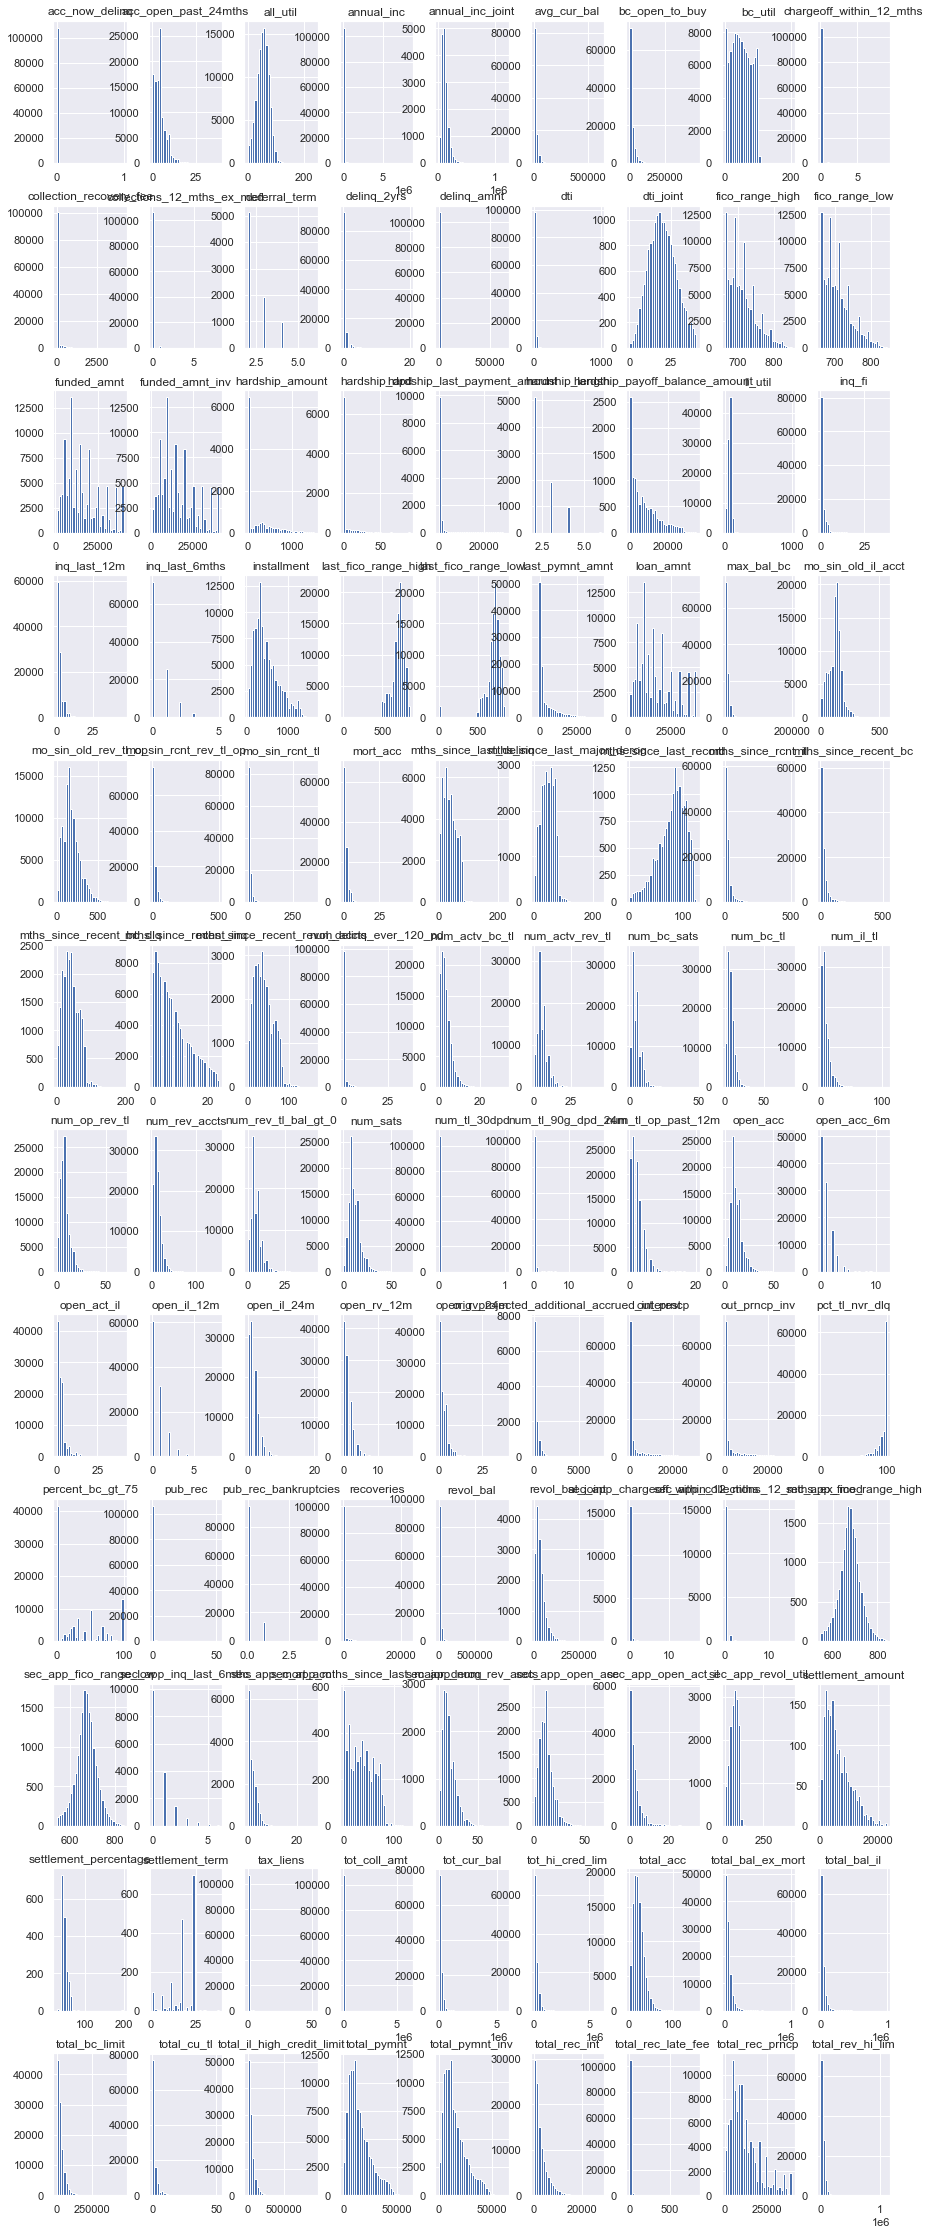

In [86]:
df_num.hist(bins=30, figsize=(15,40),layout= (12, 9))

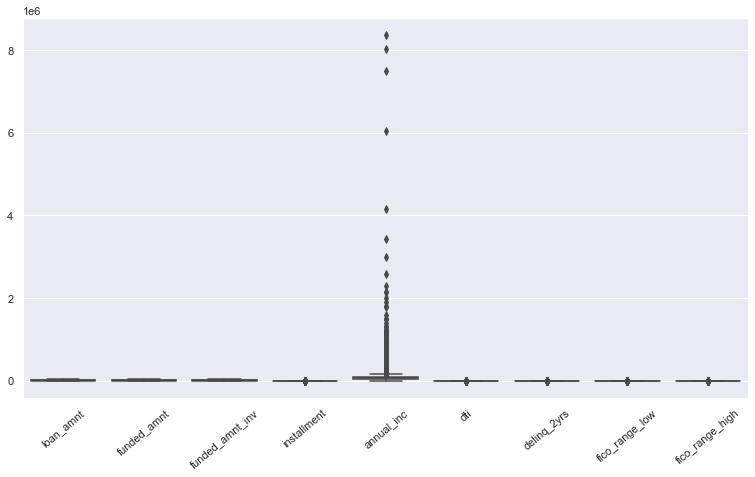

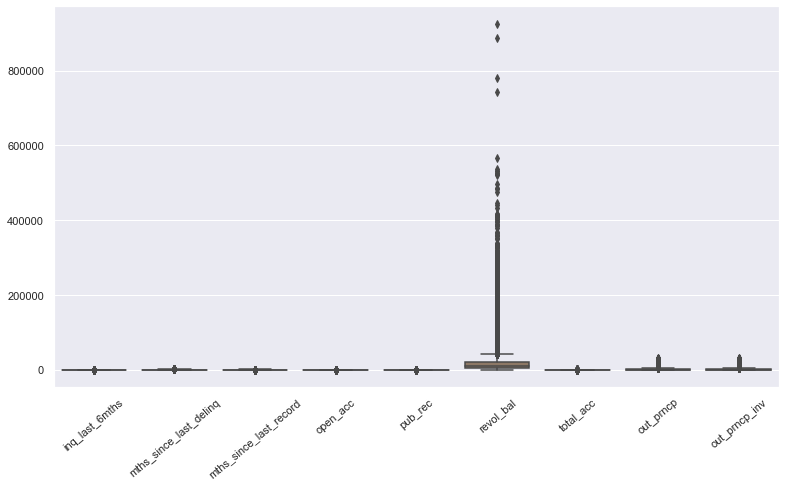

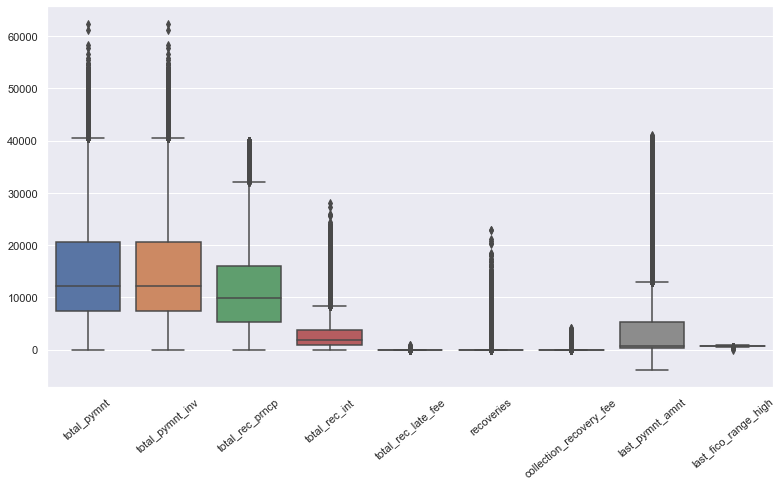

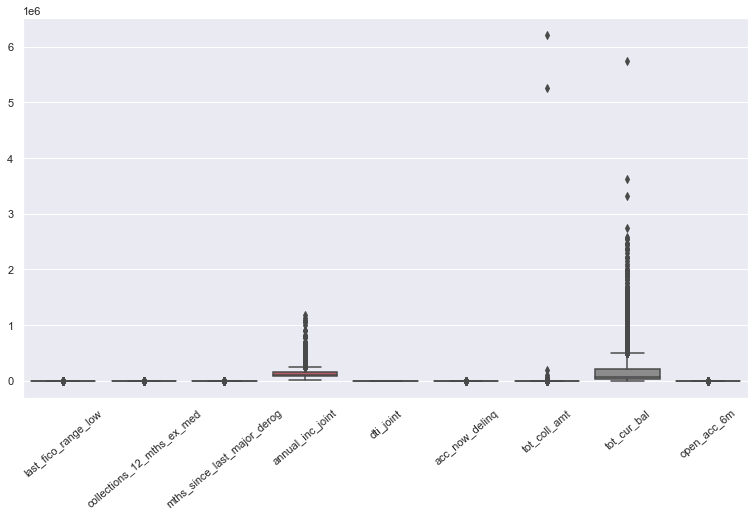

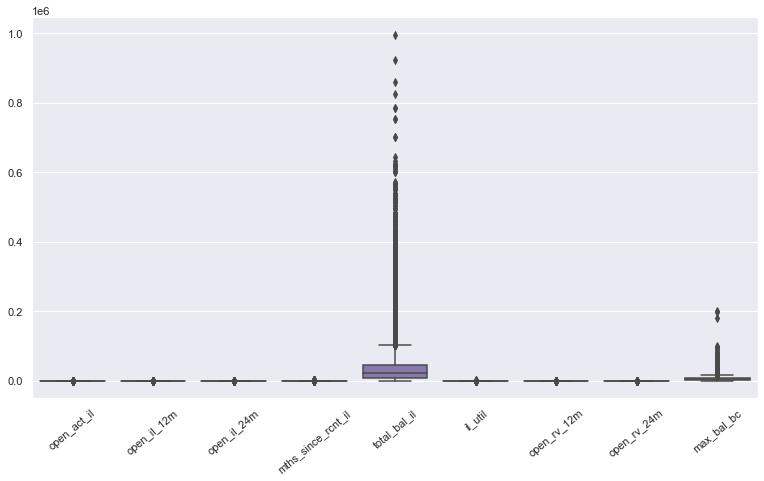

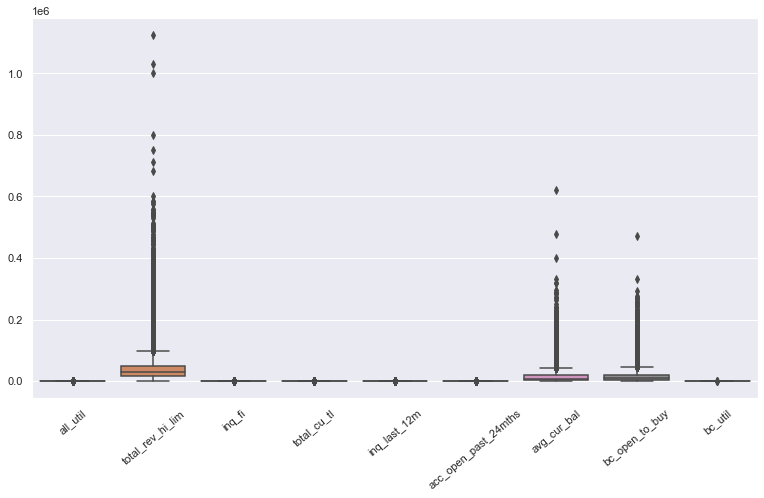

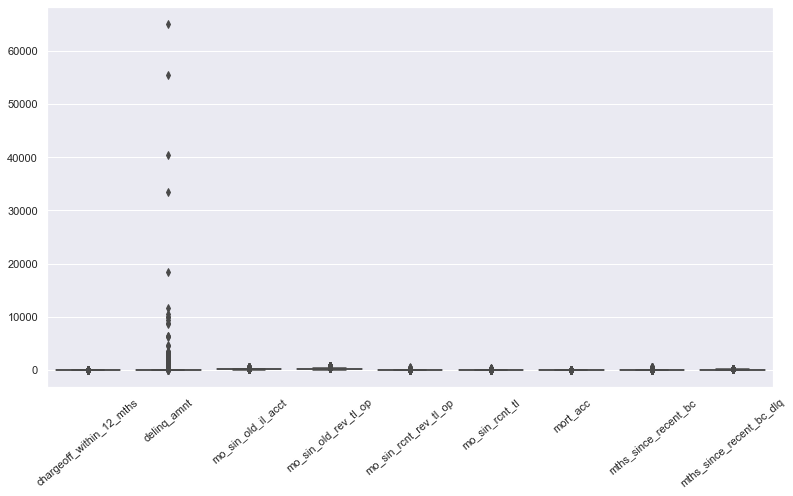

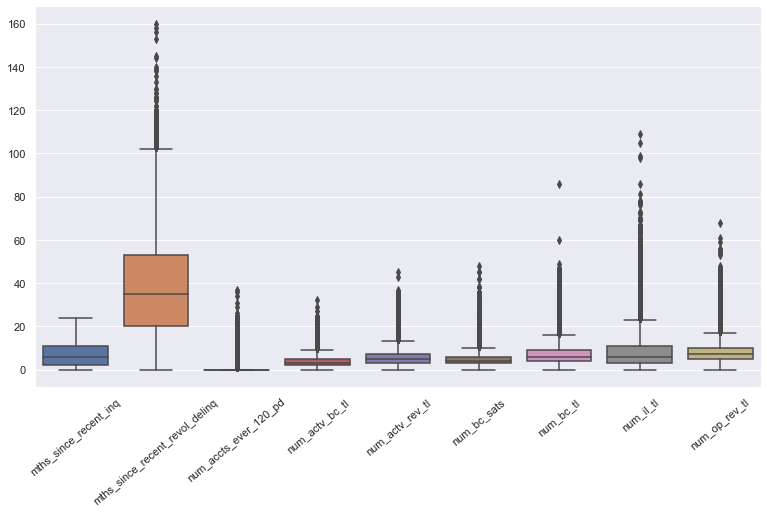

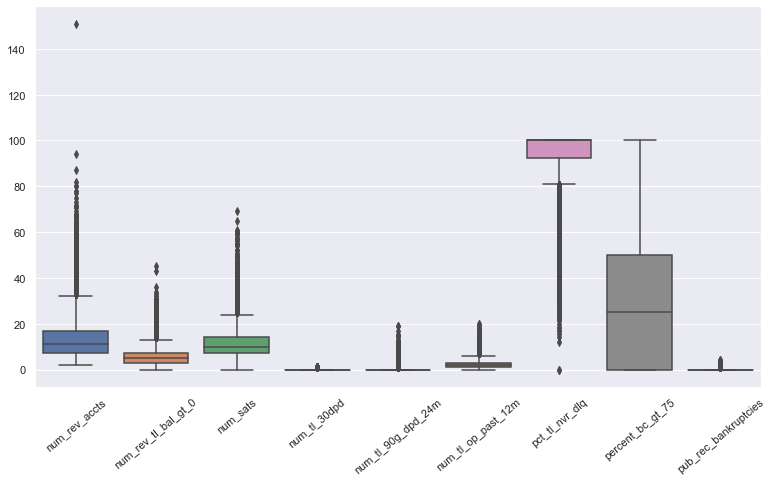

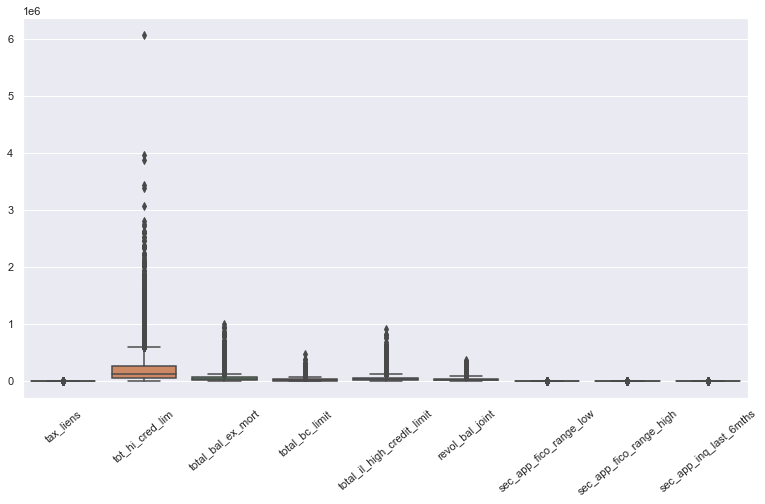

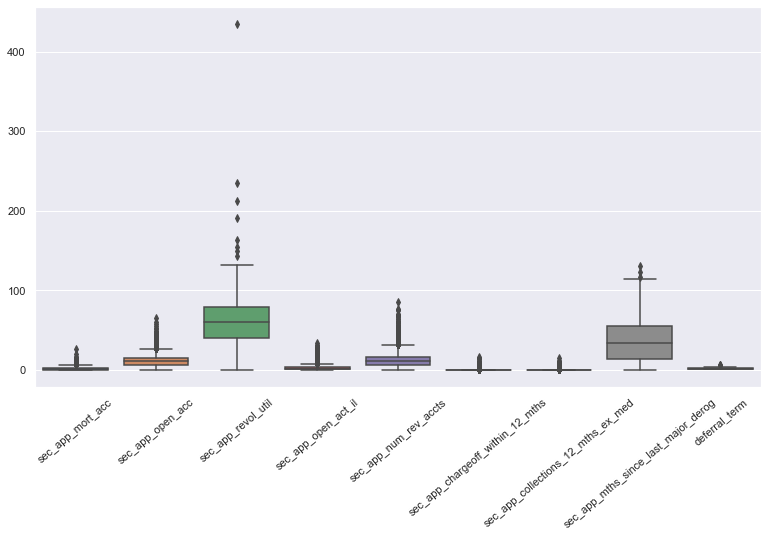

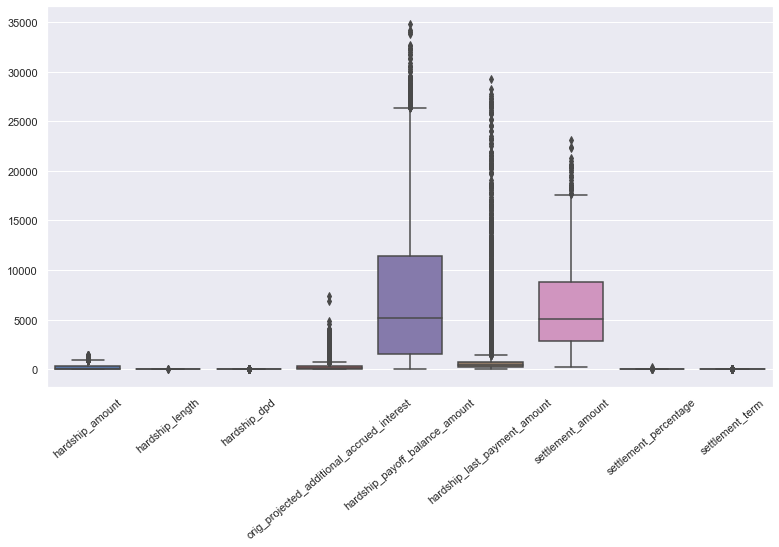

ValueError: min() arg is an empty sequence

In [88]:
# show 9 column in one plot before normalizing columns
j = 0 
for i in range(df_num.shape[1]):
    if j <= df_num.shape[1]:
        sns.set(rc={'figure.figsize':(13,7)})
        ax =sns.boxplot(data=df_num.iloc[:,j:j+9]) 
        ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
        plt.show()
        j += 9

# normalize the dataframe and boxplot again

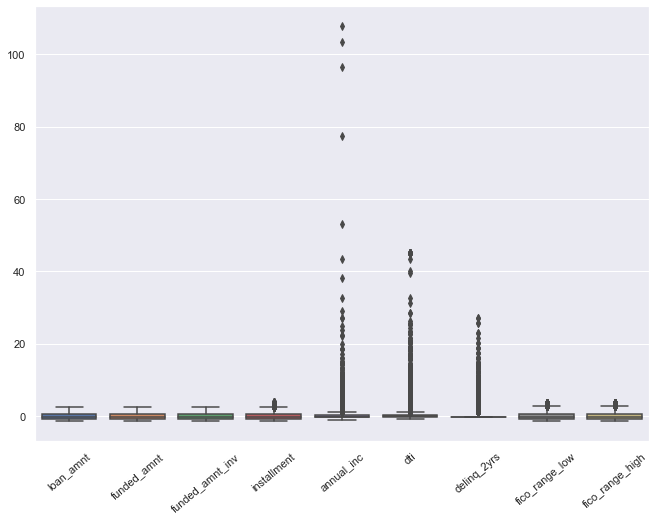

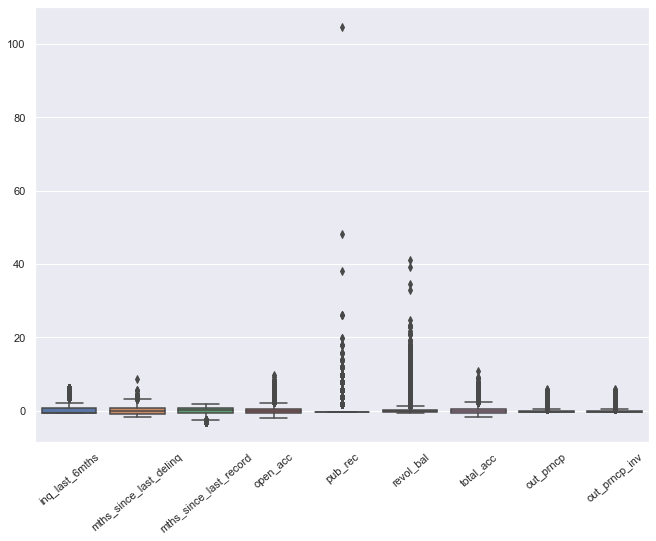

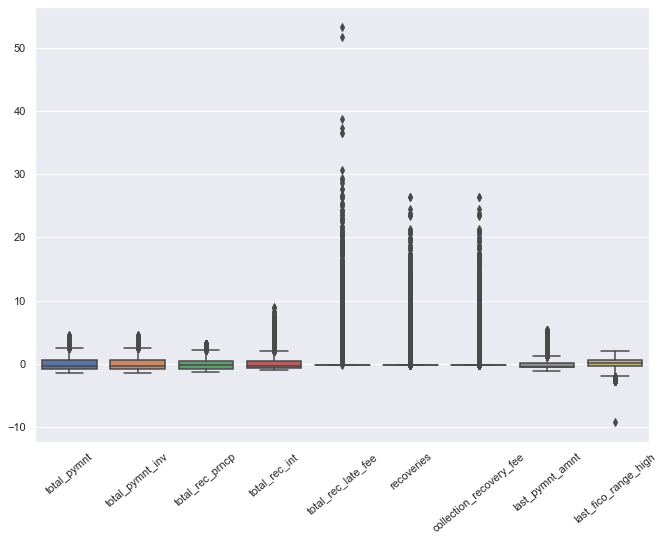

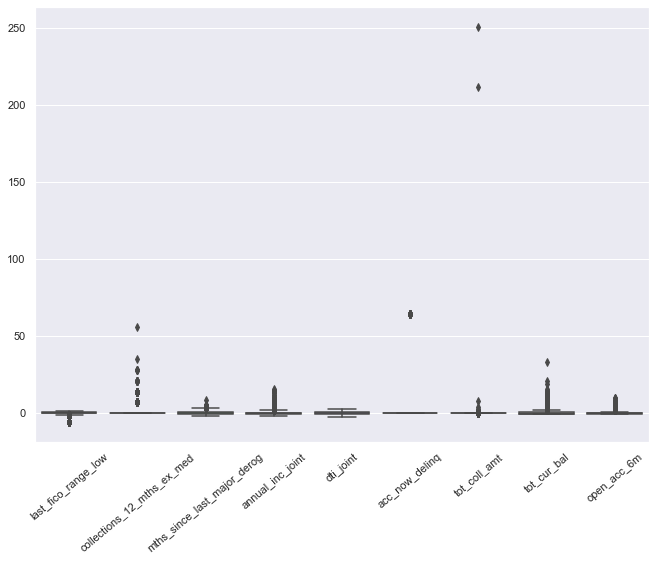

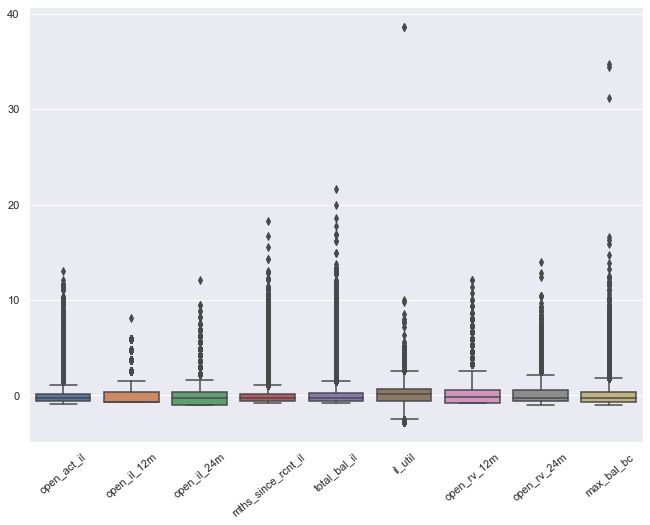

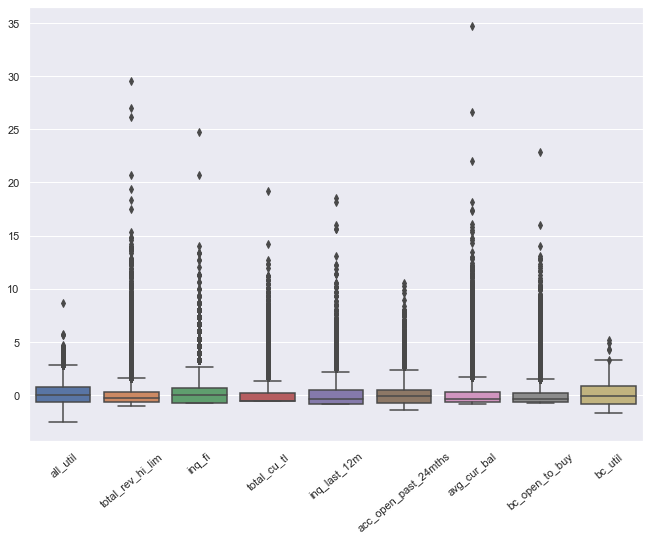

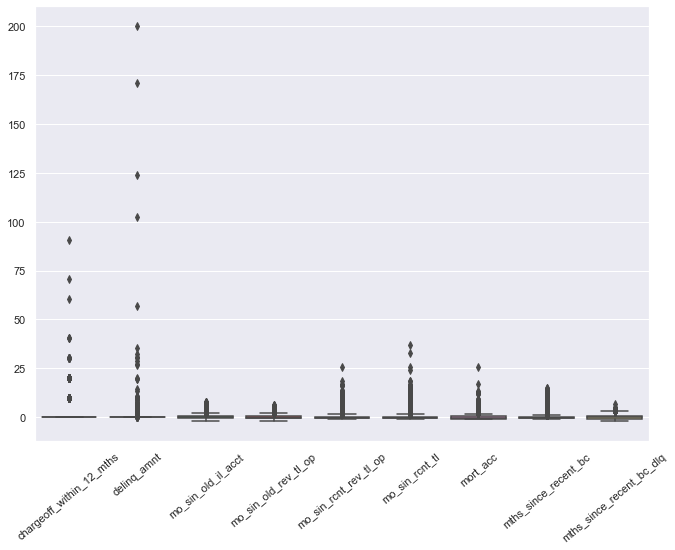

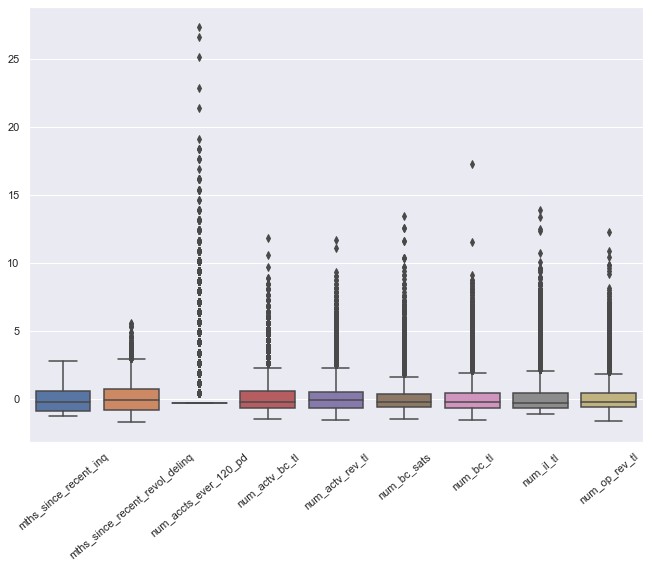

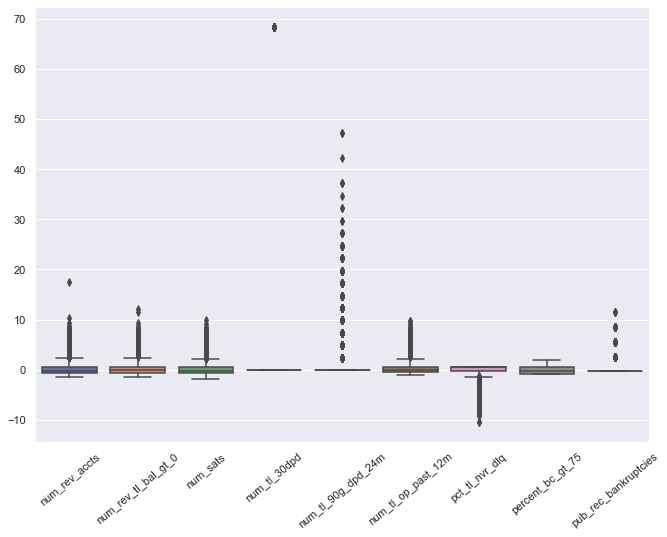

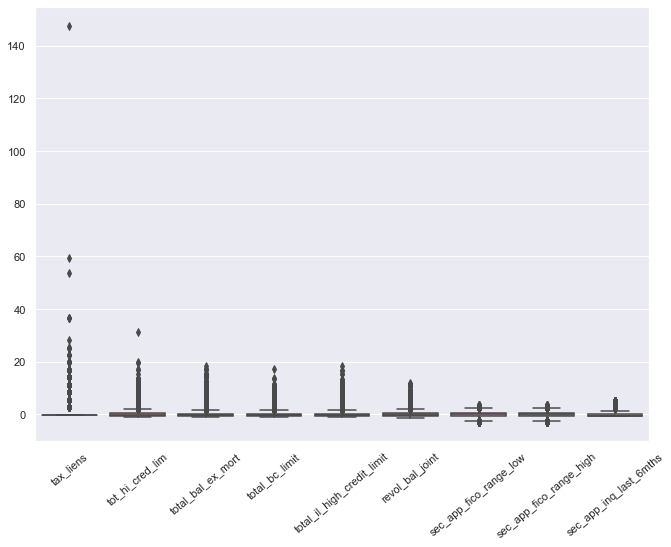

In [89]:
normalized_df_num=(df_num-df_num.mean())/df_num.std()

# show 9 column in one plotbo
j = 0 
for i in range(normalized_df_num.shape[1]):
    if j <= 81:
        sns.set(rc={'figure.figsize':(11,8)})
        ax= sns.boxplot(data=normalized_df_num.iloc[:,j:j+9]) 
        ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
        plt.show()
        j += 9

In [98]:
## subset categorical columns
df_cat = df[df.columns.difference([c for c in df_num.columns])]
df_cat.shape

(107864, 36)

In [ ]:
### visualize all the categorical variables

In [99]:
categorical = [c for c in df_cat.columns]

In [101]:
fig, ax = plt.subplots(9, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_cat[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(60)

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rhoda\Anaconda3\lib\site-

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rhoda\Anaconda3\lib\site-

Error in callback <function flush_figures at 0x0000017B0A5D2048> (for post_execute):


KeyboardInterrupt: 